
Project Description:
- Preprocess data: Explore data and apply data scaling.

Regression Task:
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 1 again on data you get from PCA. Compare your results with results in project 2. You don't need to apply all the models twice. Just copy the result table from project 1, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Classification Task:
- Apply two voting classifiers - one with hard voting and one with soft voting
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 1 again on data you get from PCA. Compare your results with results in project 1. You don't need to apply all the models twice. Just copy the result table from project 1, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Deliverables:
- Use markdown to provide inline comments for this project.
- Your outputs should be clearly executed in the notebook i.e. we should not need to rerun the code to obtain the outputs.
- Visualization encouraged.
- If you are submitting two different files, then please only one group member submit both the files. If you submit two files separately from different accounts, it will be submitted as two different attempts.
- If you are submitting two different files, then please follow below naming convetion:
    Project2_Regression_GroupXX_Firstname1_Firstname2.ipynb
    Project2_Classification_GroupXX_Firstname1_Firstname2.ipynb
- If you are submitting single file, then please follow below naming convetion:
    Project2_Both_GroupXX_Firstname1_Firstname2.ipynb

Questions regarding the project:
- We have created a discussion board under Projects folder on e-learning. Create threads over there and post your queries related to project there.
- We will also answer queries there. We will not be answering any project related queries through the mail.

In [3]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
import statistics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

##### Use the directory your csv files are stored in to import data

In [4]:
cd C:\Users\sushm\Downloads

C:\Users\sushm\Downloads


In [5]:
import warnings
warnings.filterwarnings('ignore')

# Data Extraction and Summary Statistics

In [6]:
df1 = pd.read_csv('audit_risk.csv')
df2 = pd.read_csv('trial.csv')

In [7]:
df1.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [8]:
df2.head()

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,2,0.23,2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0
3,3.89,6,0.00,2,10.80,6,10.80,6.0,6,11.75,6,2,0,2,0,2,4.4,1
4,3.89,6,0.00,2,0.08,2,0.08,5.0,2,0.00,2,2,0,2,0,2,2.0,0


In [9]:
df1.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,...,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.0,776.000000,776.000000
mean,20.184536,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,13.218481,5.067655,0.223711,...,0.519072,0.104381,0.216753,0.053608,2.702577,17.680612,0.572680,0.5,7.168158,0.393041
std,24.319017,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,51.312829,0.264449,0.080352,...,0.290312,0.531031,0.067987,0.305835,0.858923,54.740244,0.444581,0.0,38.667494,0.488741
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.537500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.583500,0.400000,0.5,0.316700,0.000000
50%,3.890000,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,1.370000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.400000,2.214000,0.400000,0.5,0.555600,0.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.840500,7.707500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,3.250000,10.663500,0.400000,0.5,3.249900,1.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,...,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.000000


In [10]:
df2.describe()

,Sector_score,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,775.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,20.184536,2.450194,3.512887,10.799988,3.131443,13.218481,5.067655,2.237113,14.137631,2.909794,2.505155,0.029639,2.061856,0.104381,2.167526,2.702577,0.626289
std,24.319017,5.678870,1.740549,50.083624,1.698042,51.312829,0.264449,0.803517,66.606519,1.597452,1.228678,0.184280,0.375080,0.531031,0.679869,0.858923,0.484100
min,1.850000,0.000000,2.000000,0.000000,2.000000,0.000000,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,2.370000,0.210000,2.000000,0.000000,2.000000,0.537500,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
50%,3.890000,0.875000,2.000000,0.405000,2.000000,1.370000,5.000000,2.000000,0.090000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.400000,1.000000
75%,55.570000,2.480000,6.000000,4.160000,4.000000,7.707500,5.000000,2.000000,5.595000,4.000000,2.000000,0.000000,2.000000,0.000000,2.000000,3.250000,1.000000
max,59.850000,85.000000,6.000000,1264.630000,6.000000,1268.910000,9.000000,6.000000,935.030000,6.000000,6.000000,2.000000,6.000000,9.000000,6.000000,5.200000,1.000000


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
Sector_score      776 non-null float64
LOCATION_ID       776 non-null object
PARA_A            776 non-null float64
Score_A           776 non-null float64
Risk_A            776 non-null float64
PARA_B            776 non-null float64
Score_B           776 non-null float64
Risk_B            776 non-null float64
TOTAL             776 non-null float64
numbers           776 non-null float64
Score_B.1         776 non-null float64
Risk_C            776 non-null float64
Money_Value       775 non-null float64
Score_MV          776 non-null float64
Risk_D            776 non-null float64
District_Loss     776 non-null int64
PROB              776 non-null float64
RiSk_E            776 non-null float64
History           776 non-null int64
Prob              776 non-null float64
Risk_F            776 non-null float64
Score             776 non-null float64
Inherent_Risk     776 non-null float64
CON

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 18 columns):
Sector_score     776 non-null float64
LOCATION_ID      776 non-null object
PARA_A           776 non-null float64
SCORE_A          776 non-null int64
PARA_B           776 non-null float64
SCORE_B          776 non-null int64
TOTAL            776 non-null float64
numbers          776 non-null float64
Marks            776 non-null int64
Money_Value      775 non-null float64
MONEY_Marks      776 non-null int64
District         776 non-null int64
Loss             776 non-null int64
LOSS_SCORE       776 non-null int64
History          776 non-null int64
History_score    776 non-null int64
Score            776 non-null float64
Risk             776 non-null int64
dtypes: float64(7), int64(10), object(1)
memory usage: 109.2+ KB


# Detecting Anomalies, Imputing Missing Values and Preprocessing Data

In [13]:
print(df1.isna().sum())
print(df2.isna().sum())

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64
Sector_score     0
LOCATION_ID      0
PARA_A           0
SCORE_A          0
PARA_B           0
SCORE_B          0
TOTAL            0
numbers          0
Marks            0
Money_Value      1
MONEY_Marks      0
District         0
Loss             0
LOSS_SCORE       0
History          0
History_score    0
Score            0
Risk             0
dtype: int64


In [14]:
df1[df1['Money_Value'].isnull()]  #row642

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
642,55.57,4,0.23,0.2,0.046,0.0,0.2,0.0,0.23,5.0,...,0.4,0,0.2,0.0,2.0,1.446,0.4,0.5,0.2892,0


In [15]:
df2[df2['Money_Value'].isnull()]  #row642

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
642,55.57,4,0.23,2,0.0,2,0.23,5.0,2,NaN,2,2,0,2,0,2,2.0,0


##### Both data sets have missing values in Money_Value in the same row, so we will impute the value with median for the merged dataframe later

In [16]:
print(df1.shape)
print(df2.shape)

(776, 27)
(776, 18)


In [17]:
print(df1.columns)
print(df2.columns)

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk'],
      dtype='object')
Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'SCORE_A', 'PARA_B', 'SCORE_B',
       'TOTAL', 'numbers', 'Marks', 'Money_Value', 'MONEY_Marks', 'District',
       'Loss', 'LOSS_SCORE', 'History', 'History_score', 'Score', 'Risk'],
      dtype='object')


##### Renaming Risk column in trial dataset to Risk_trial since it's different than Risk in audit_risk

In [18]:
df2 = df2.rename(columns={"Risk": "Risk_trial"})

##### Finding out how many columns are different in the 2 datasets

In [19]:
cols = df2.columns.difference(df1.columns)
cols

Index(['District', 'History_score', 'LOSS_SCORE', 'Loss', 'MONEY_Marks',
       'Marks', 'Risk_trial', 'SCORE_A', 'SCORE_B'],
      dtype='object')

###### Merging into 1 dataset using only the new columns from df2

In [20]:
df = pd.concat([df1, df2[cols]], axis=1)

In [21]:
df['Money_Value'].fillna(df.loc[:,"Money_Value"].median(), inplace = True)
df = df.drop(['SCORE_A'],axis=1)
df = df.drop(['SCORE_B'],axis=1) #Here we drop Score_A and Score_B as they are 2 similar columns

In [22]:
df['LOCATION_ID'].unique()

array(['23', '6', '7', '8', '13', '37', '24', '3', '4', '14', '5', '20',
       '19', '21', '22', '9', '11', '12', '29', '30', '38', '31', '2',
       '32', '16', '33', '15', '36', '34', '18', '25', '39', '27', '35',
       '40', '41', '42', '1', '28', 'LOHARU', 'NUH', 'SAFIDON', '43',
       '44', '17'], dtype=object)

In [23]:
df.replace('LOHARU', '10', inplace = True)
df.replace('NUH', '26', inplace = True)
df.replace('SAFIDON', '45', inplace = True)
df['LOCATION_ID'] = df['LOCATION_ID'].astype(int)
df['LOCATION_ID'].unique()

array([23,  6,  7,  8, 13, 37, 24,  3,  4, 14,  5, 20, 19, 21, 22,  9, 11,
       12, 29, 30, 38, 31,  2, 32, 16, 33, 15, 36, 34, 18, 25, 39, 27, 35,
       40, 41, 42,  1, 28, 10, 26, 45, 43, 44, 17], dtype=int64)

In [24]:
df.shape

(776, 34)

###### Dropping duplicated rows

In [25]:
(df.duplicated(subset=None, keep = 'first')).sum()

13

In [26]:
df = df.drop_duplicates(keep='first')
df.shape 

(763, 34)

###### Plotting a correlation matrix

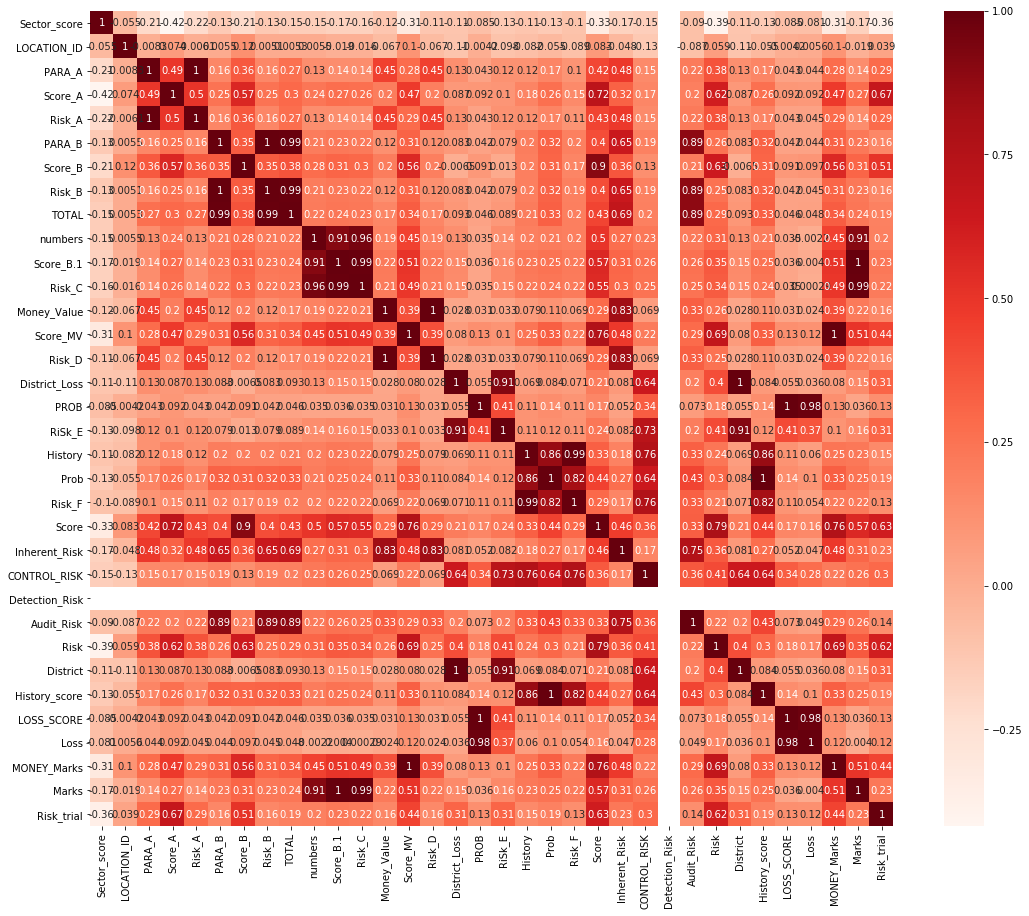

In [27]:
plt.figure(figsize=(18,15))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

Observations:
1. Correlation between PARA_A and Risk_A is 1
2. Correlation between PARA_B and Risk_B is 1
3. Correlation between Marks and Score_B.1 is 1
4. Correlation between Risk_D and Money_Value is 1
5. Correlation between MONEY_Marks and Score_MV is 1
6. Correlation between PROB and LOSS_Score is 1
7. Correlation between Prob and History_score is 1
8. Correlation between District and District_Loss is 1
8. Correlation between Risk_F and History is 0.99
9. Correlation between PARA_B and Total is 0.99
10. Correlation between Risk_B and Total is 0.99
11. Correlation between Marks and Risk_C is 0.99
12. Correlation between Loss and LOSS_Score is 0.98

Therefore, we are not going to use the following columns for our analysis

Risk_A, Risk_B, TOTAL, Risk_C, Risk_D, RISK_E, Risk_F, Score_B.1, Score_MV, PROB, Prob, Loss,District, marks


Also eliminated: Decision_Risk and Location_ID(would need one hot vector adding too many variables)

# Handing Outliers

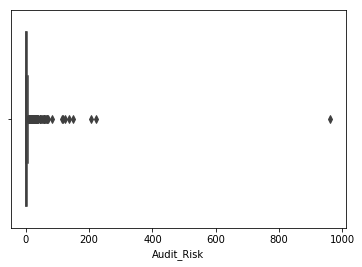

In [28]:
sns.boxplot(x=df['Audit_Risk'])

In [29]:
df.loc[df['Audit_Risk'] > 900]

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,Detection_Risk,Audit_Risk,Risk,District,History_score,LOSS_SCORE,Loss,MONEY_Marks,Marks,Risk_trial
241,2.72,2,4.28,0.6,2.568,1264.63,0.6,758.778,1268.91,5.5,...,0.5,961.5144,1,6,6,2,0,6,4,1


In [30]:
ind = df[df['Audit_Risk'] > 900].index
df = df.drop(ind)

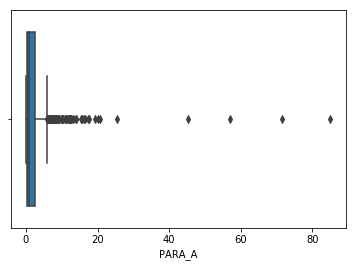

In [31]:
sns.boxplot(x=df['PARA_A'])

In [32]:
df.loc[df['PARA_A'] > 40.000000]

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,Detection_Risk,Audit_Risk,Risk,District,History_score,LOSS_SCORE,Loss,MONEY_Marks,Marks,Risk_trial
81,3.89,2,71.48,0.6,42.888,25.63,0.6,15.378,97.11,5.0,...,0.5,116.7376,1,2,2,2,0,6,2,1
342,1.99,2,57.03,0.6,34.218,134.33,0.6,80.598,191.36,5.0,...,0.5,124.5676,1,2,2,2,0,6,2,1
467,1.85,19,45.23,0.6,27.138,36.18,0.6,21.708,81.41,5.0,...,0.5,30.6276,1,6,2,2,0,2,2,1
509,21.61,9,85.00,0.6,51.000,1.06,0.4,0.424,86.06,5.0,...,0.5,32.1744,1,6,2,2,0,2,2,1


In [33]:
ind = df[df['PARA_A'] > 40].index
df = df.drop(ind)

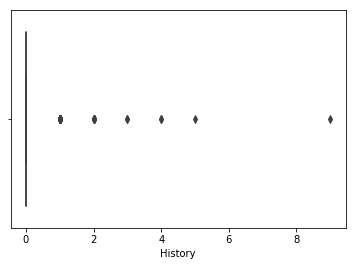

In [34]:
sns.boxplot(x=df['History'])

In [35]:
df.loc[df['History'] > 4.000000]

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,Detection_Risk,Audit_Risk,Risk,District,History_score,LOSS_SCORE,Loss,MONEY_Marks,Marks,Risk_trial
80,3.89,2,0.00,0.2,0.000,3.72,0.2,0.744,3.72,5.0,...,0.5,21.8776,1,2,6,2,0,2,2,1
276,2.37,6,2.51,0.6,1.506,8.59,0.6,5.154,11.10,5.5,...,0.5,37.1926,1,2,6,2,0,6,4,1


In [36]:
ind = df.loc[df['History'] > 4.000000].index
df = df.drop(ind)

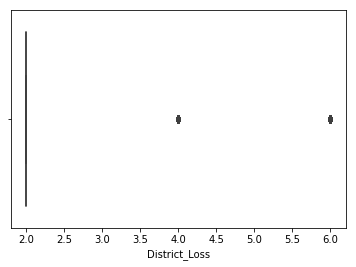

In [37]:
sns.boxplot(x=df['District_Loss'])

In [38]:
df.loc[df['District_Loss'] >= 6]

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,Detection_Risk,Audit_Risk,Risk,District,History_score,LOSS_SCORE,Loss,MONEY_Marks,Marks,Risk_trial
93,3.89,16,15.7200,0.6,9.43200,57.94,0.6,34.764,73.6600,6.0,...,0.5,33.282000,1,6,2,2,0,6,6,1
94,3.89,16,4.9500,0.6,2.97000,42.61,0.6,25.566,47.5600,5.0,...,0.5,25.462400,1,6,4,2,0,2,2,1
95,3.89,16,0.0000,0.2,0.00000,0.08,0.2,0.016,0.0800,5.0,...,0.5,1.336800,1,6,2,2,0,2,2,1
96,3.89,16,1.1900,0.4,0.47600,12.88,0.6,7.728,14.0700,5.0,...,0.5,6.522000,1,6,2,2,0,2,2,1
97,3.89,16,0.0000,0.2,0.00000,2.72,0.2,0.544,2.7200,5.0,...,0.5,2.985600,1,6,2,2,0,4,2,1
98,3.89,16,0.0000,0.2,0.00000,1.66,0.2,0.332,1.6600,5.0,...,0.5,1.610400,1,6,2,2,0,2,2,1
99,3.89,16,6.4700,0.6,3.88200,12.18,0.6,7.308,18.6500,5.0,...,0.5,17.131200,1,6,2,2,0,6,2,1
100,3.89,16,1.3300,0.4,0.53200,0.00,0.2,0.000,1.3300,5.0,...,0.5,1.663200,1,6,2,2,0,2,2,1
101,3.89,16,0.0000,0.2,0.00000,1.10,0.2,0.220,1.1000,5.0,...,0.5,1.452000,1,6,2,2,0,2,2,1
125,3.41,12,25.4000,0.6,15.24000,51.74,0.6,31.044,77.1400,5.0,...,0.5,68.743200,1,6,6,2,0,6,2,1


In [39]:
ind = df.loc[df['District_Loss'] >= 6].index
df = df.drop(ind)

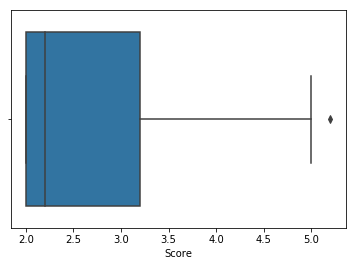

In [40]:
sns.boxplot(x=df['Score'])

In [41]:
df.loc[df['Score']>5]

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,Detection_Risk,Audit_Risk,Risk,District,History_score,LOSS_SCORE,Loss,MONEY_Marks,Marks,Risk_trial
190,2.72,18,5.11,0.6,3.066,53.76,0.6,32.256,58.87,6.0,...,0.5,55.7264,1,2,6,2,0,6,6,1


In [42]:
ind = df.loc[df['Score'] > 5].index
df = df.drop(ind)

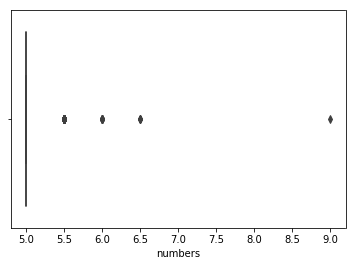

In [43]:
sns.boxplot(x=df['numbers'])

In [44]:
df.loc[df['numbers']>6]

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,Detection_Risk,Audit_Risk,Risk,District,History_score,LOSS_SCORE,Loss,MONEY_Marks,Marks,Risk_trial
124,3.41,11,1.44,0.4,0.576,9.65,0.4,3.860,11.09,6.5,...,0.5,2.9508,1,2,2,2,0,6,6,1
157,3.41,40,10.37,0.6,6.222,105.56,0.6,63.336,115.93,9.0,...,0.5,21.3272,1,2,2,2,0,6,6,1
208,2.72,5,1.90,0.4,0.760,35.04,0.6,21.024,36.94,6.5,...,0.5,7.1596,1,2,2,2,0,6,6,1
226,2.72,8,5.61,0.6,3.366,99.33,0.6,59.598,104.94,6.5,...,0.5,22.6292,1,2,2,2,0,6,6,1
245,2.72,7,3.04,0.6,1.824,67.37,0.6,40.422,70.41,6.5,...,0.5,18.6056,1,2,2,2,0,6,6,1


In [45]:
ind = df.loc[df['numbers'] > 6].index
df = df.drop(ind)

In [46]:
df.shape #(681,34)

(681, 34)

# Feature Selection

In [47]:
df.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk', 'District', 'History_score',
       'LOSS_SCORE', 'Loss', 'MONEY_Marks', 'Marks', 'Risk_trial'],
      dtype='object')

##### After fine tuning several variables, the chosen X and y variables for regression and classification are as follows:

###### X and y for regression -

In [48]:
df_var = df[['Sector_score','PARA_A', 'PARA_B','numbers','Money_Value', 'History', 'Score', 'District', 'Loss','MONEY_Marks','Inherent_Risk']]

In [49]:
df_target_re = df['Audit_Risk']
df_target_re = df_target_re.ravel()

###### X and y for classification -

In [50]:
X = df[['Sector_score', 'PARA_A', 'PARA_B', 'Score_A', 'Score_B', 'numbers',
       'Money_Value', 'History', 'History_score', 'Score', 'District',
       'LOSS_SCORE', 'Inherent_Risk', 'CONTROL_RISK']]

###### Since risk and trial risk have different values, there are two sets of y variables we will work with

In [51]:
y1 = df['Risk']
y1 = y1.ravel()

In [52]:
y2 = df['Risk_trial']
y2 = y2.ravel()

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
X_train_org, X_test_org, y_train, y_test = train_test_split(df_var,df_target_re, random_state = 0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

# Bagging

### 1.Bagging using Decision tree regressor

Text(0, 0.5, 'Scores')

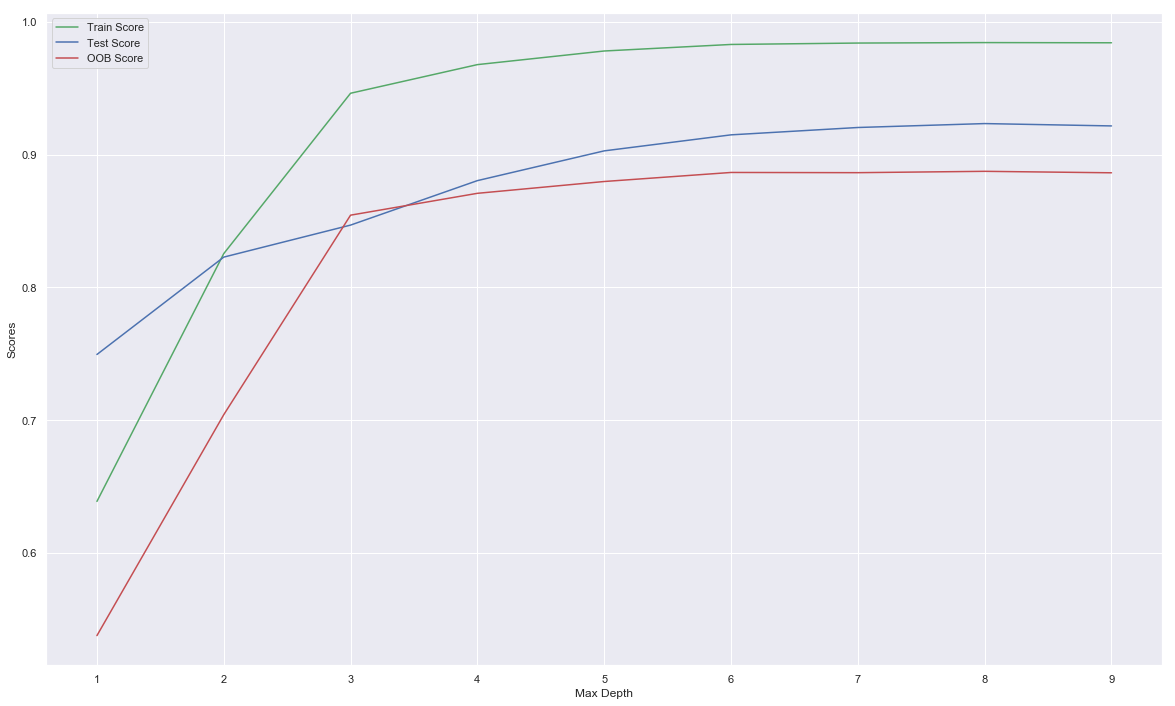

In [55]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

sns.set(rc={'figure.figsize':(20,12)})


train_score_array = []
test_score_array = []
oob_score_array=[]

for n in range(1,10):
    dt_reg = DecisionTreeRegressor(max_depth=n,random_state=0)
    bag_reg_dt = BaggingRegressor(dt_reg, n_estimators=500, max_samples=500, bootstrap=True,random_state=0,oob_score=True)
    bag_reg_dt.fit(X_train, y_train)
    train_score_array.append(bag_reg_dt.score(X_train, y_train))
    test_score_array.append(bag_reg_dt.score(X_test, y_test))
    oob_score_array.append(bag_reg_dt.oob_score_)

x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.plot(x_axis, oob_score_array, c = 'r', label = 'OOB Score')
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Scores')

In [56]:
dt_reg = DecisionTreeRegressor(max_depth=10,random_state=0)
bag_reg_dt = BaggingRegressor(dt_reg, n_estimators=500, max_samples=500, bootstrap=True,random_state=0,oob_score=True)
bag_reg_dt.fit(X_train, y_train)

y_pred=bag_reg_dt.predict(X_test)

print('Train score: {:.4f} %'.format(bag_reg_dt.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(bag_reg_dt.score(X_test, y_test)*100))

print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))

Train score: 98.4044 %
Test score: 92.0625 %
RMSE: 2.2139


### 2.Bagging using Random Forest Regressor

Text(0, 0.5, 'Scores')

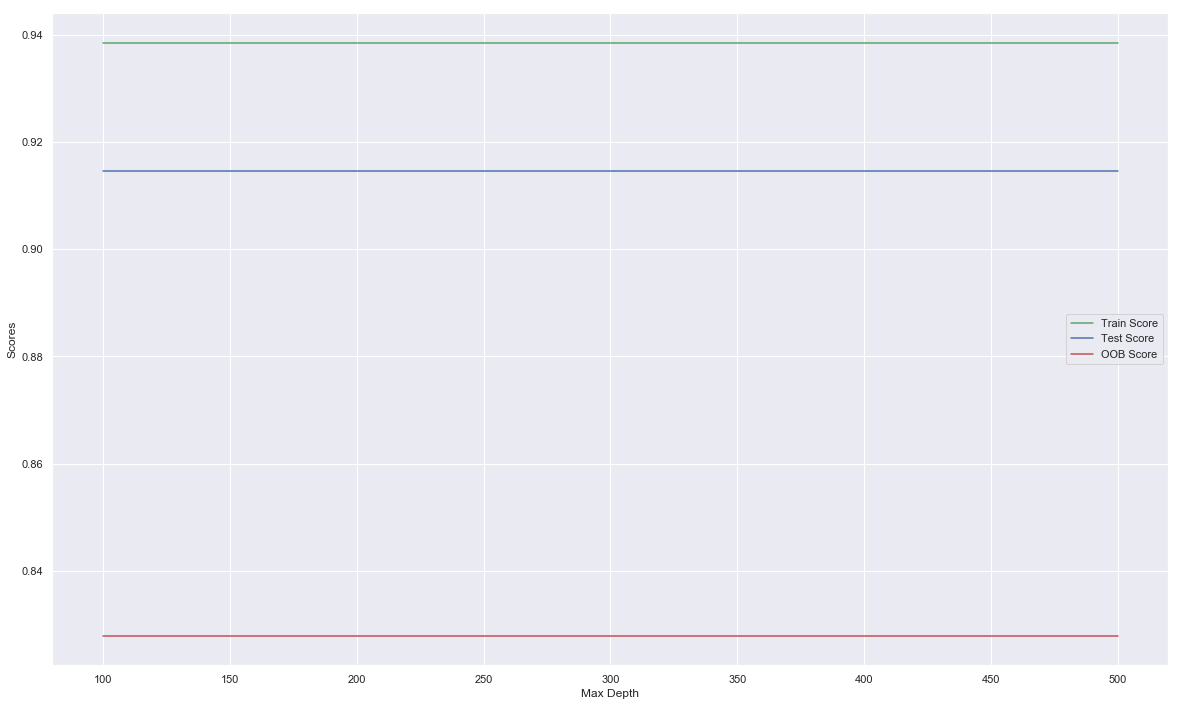

In [57]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

sns.set(rc={'figure.figsize':(20,12)})


train_score_array = []
test_score_array = []
oob_score_array=[]

for n in [100,200,500]:
    dt_reg = RandomForestRegressor(max_depth=n,random_state=0)
    bag_reg_dt = BaggingRegressor(dt_reg, n_estimators=500, max_samples=500, bootstrap=True,random_state=0,oob_score=True)
    bag_reg_dt.fit(X_train, y_train)
    train_score_array.append(bag_reg_dt.score(X_train, y_train))
    test_score_array.append(bag_reg_dt.score(X_test, y_test))
    oob_score_array.append(bag_reg_dt.oob_score_)

x_axis = [100,200,500]
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.plot(x_axis, oob_score_array, c = 'r', label = 'OOB Score')
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Scores')

In [58]:
dt_reg = RandomForestRegressor(max_depth=10,random_state=0)
bag_reg_dt = BaggingRegressor(dt_reg, n_estimators=500, max_samples=500, bootstrap=True,random_state=0,oob_score=True)
bag_reg_dt.fit(X_train, y_train)

y_pred=bag_reg_dt.predict(X_test)

print('Train score: {:.4f} %'.format(bag_reg_dt.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(bag_reg_dt.score(X_test, y_test)*100))

print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))

Train score: 93.8884 %
Test score: 91.4026 %
RMSE: 2.3041


### Bagging Results:
#### 1.Using Decision Tree Regressor:
 RMSE: 2.2139
#### 2.Using Random Forest Regressor:
 RMSE: 2.3041
### Based on the RMSE,we can conclude that Bagging using Decision Tree regressor is better than Randon Tree regressor

# Pasting

### Pasting using SVM (kernel=rbf)

Text(0, 0.5, 'Scores')

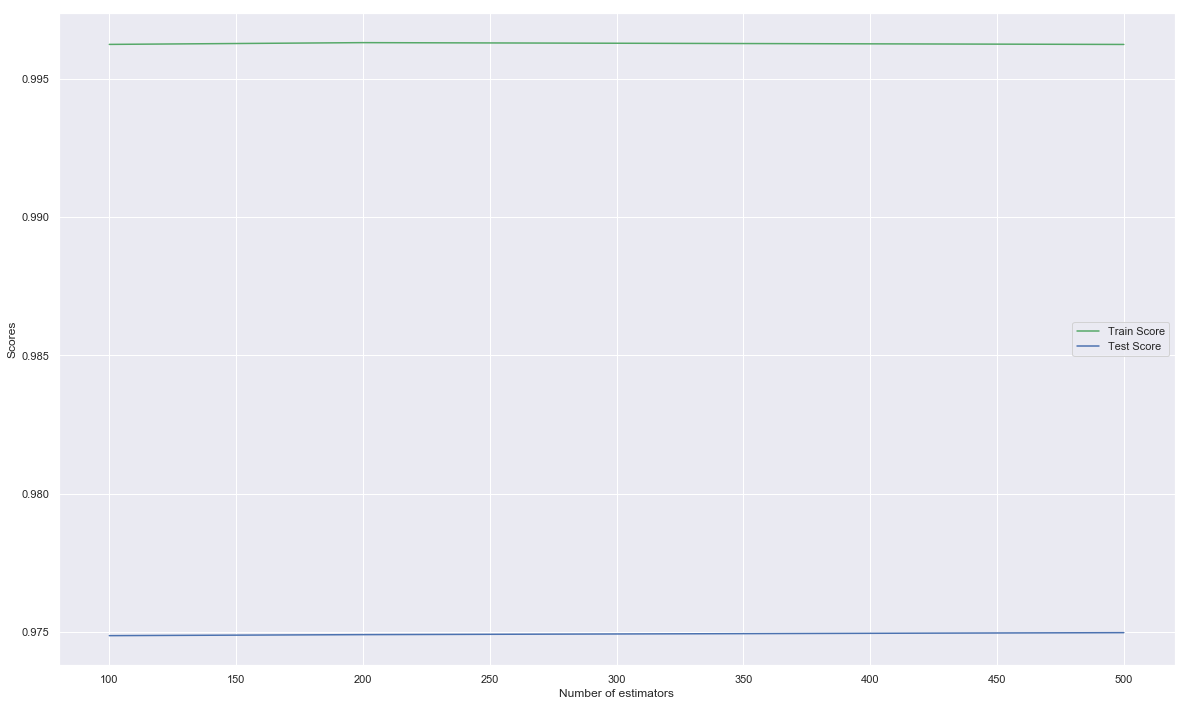

In [59]:
from sklearn.svm import SVR

sns.set(rc={'figure.figsize':(20,12)})

train_score_array = []
test_score_array = []

svm_reg=SVR(C=100,gamma=0.01, kernel='rbf') #Considered C and gamma values post grid search on SVM in Project 1

for n_estimators in [100,200,500]:
    bag_reg_svm = BaggingRegressor(svm_reg, n_estimators=n_estimators, max_samples=500, bootstrap=False,random_state=0)
    bag_reg_svm.fit(X_train, y_train)
    train_score_array.append(bag_reg_svm.score(X_train, y_train))
    test_score_array.append(bag_reg_svm.score(X_test, y_test))

x_axis = [100,200,500]
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('Number of estimators')
plt.ylabel('Scores')

In [60]:
svm_reg=SVR(C=100,gamma=0.01, kernel='rbf')

bag_reg_svm = BaggingRegressor(svm_reg, n_estimators=200, max_samples=500, bootstrap=False,random_state=0)
bag_reg_svm.fit(X_train, y_train)

y_pred=bag_reg_svm.predict(X_test)

print('Train score: {:.4f} %'.format(bag_reg_svm.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(bag_reg_svm.score(X_test, y_test)*100))

print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))

Train score: 99.6315 %
Test score: 97.4902 %
RMSE: 1.2449


### 2. Pasting using Decision Tree Regressor

Text(0, 0.5, 'Scores')

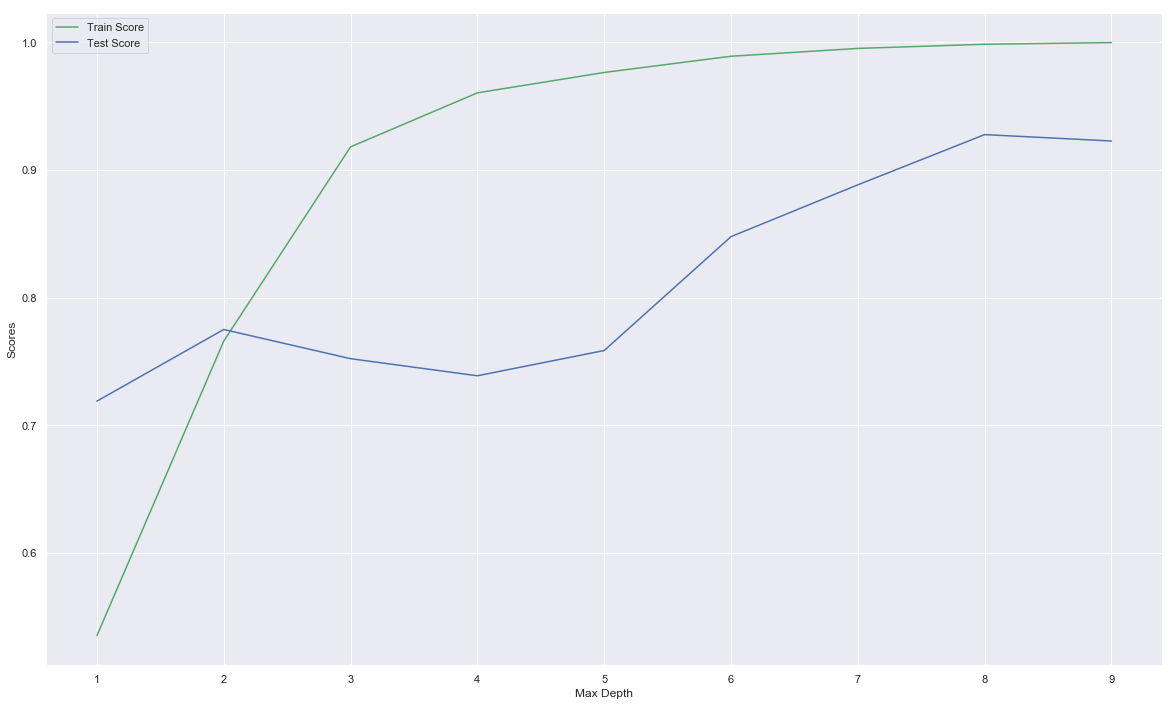

In [61]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

sns.set(rc={'figure.figsize':(20,12)})


train_score_array = []
test_score_array = []
oob_score_array=[]

for n in range(1,10):
    dt_reg = DecisionTreeRegressor(max_depth=n,random_state=0)
    bag_reg_dt = BaggingRegressor(dt_reg, n_estimators=500, max_samples=500, bootstrap=False,random_state=0)
    bag_reg_dt.fit(X_train, y_train)
    train_score_array.append(bag_reg_dt.score(X_train, y_train))
    test_score_array.append(bag_reg_dt.score(X_test, y_test))
    
x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Scores')

In [62]:
dt_reg = DecisionTreeRegressor(max_depth=10,random_state=0)
bag_reg_dt = BaggingRegressor(dt_reg, n_estimators=500, max_samples=500, bootstrap=True,random_state=0)
bag_reg_dt.fit(X_train, y_train)

y_pred=bag_reg_dt.predict(X_test)

print('Train score: {:.4f} %'.format(bag_reg_dt.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(bag_reg_dt.score(X_test, y_test)*100))

print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))

Train score: 98.4044 %
Test score: 92.0625 %
RMSE: 2.2139


### Pasting Results:
#### 1. Using SVM (kernel = rbf)
RMSE: 1.2249
#### 2.Using Decision Tree Regressor
 RMSE:2.2139
###  Based on the RMSE,we can conclude that Pasting using SVM (kernel=rbf) is better than Decision Tree regressor

# Adaboosting

### 1.Adaboost using Decision tree regressor

In [63]:
from sklearn.ensemble import AdaBoostRegressor

train_score_array = []
test_score_array = []
best_score=0


for n in range(1,10):
    for learning_rate in [0.001,0.01,0.1,1,10,100]:
        for n_estimators in [50,100,150,200,250,500]:
            dtree_reg=DecisionTreeRegressor(max_depth=n)
            ada_reg_dtree = AdaBoostRegressor(dtree_reg, n_estimators=n_estimators,learning_rate=learning_rate,random_state=0)
            ada_reg_dtree.fit(X_train, y_train)
            train_score_array.append(ada_reg_dtree.score(X_train, y_train))
            test_score_array.append(ada_reg_dtree.score(X_test, y_test))
            score=ada_reg_dtree.score(X_test, y_test)
            if(score>best_score):
                best_score=score
                best_parameters = {'learning_rate': learning_rate, 'max_depth': n,'n_estimators':n_estimators}

print(best_parameters)

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 500}


Text(0, 0.5, 'Scores')

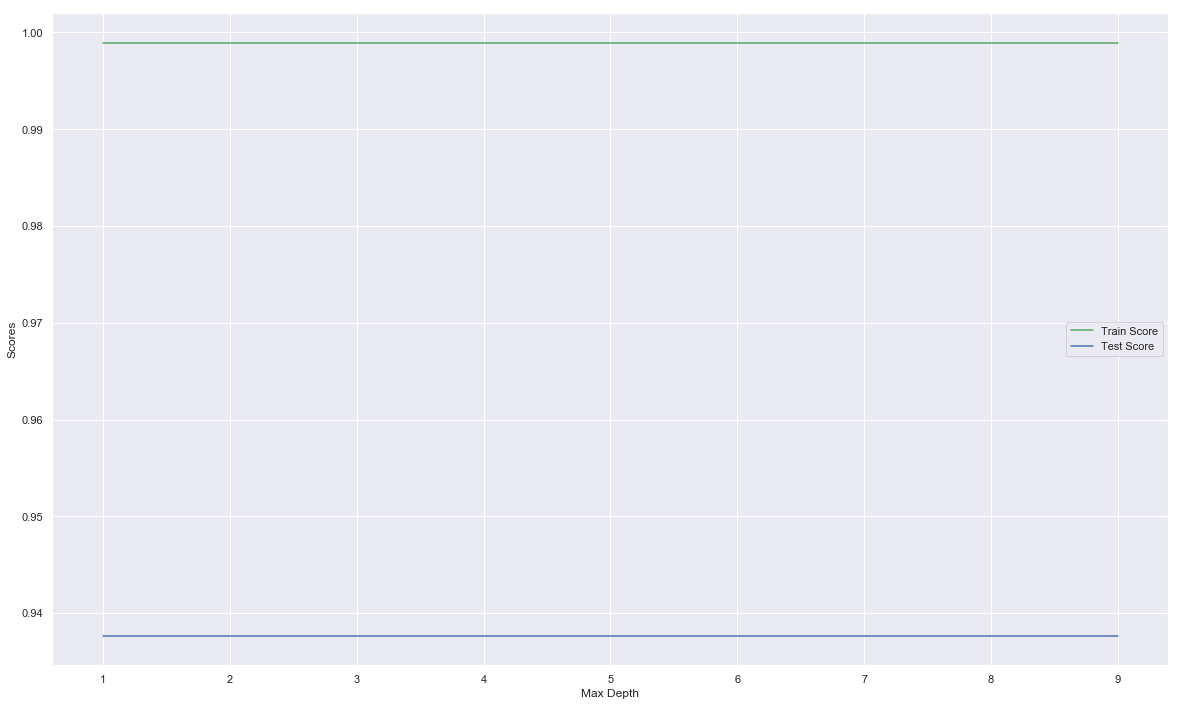

In [64]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

sns.set(rc={'figure.figsize':(20,12)})


train_score_array = []
test_score_array = []
oob_score_array=[]

for n in range(1,10):
    dt_reg = DecisionTreeRegressor(max_depth=n,random_state=0)
    ada_reg_dt = AdaBoostRegressor(DecisionTreeRegressor(max_depth=6), n_estimators=500, learning_rate=0.1, random_state=0)
    ada_reg_dt.fit(X_train, y_train)
    train_score_array.append(ada_reg_dt.score(X_train, y_train))
    test_score_array.append(ada_reg_dt.score(X_test, y_test))
    
x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Scores')

In [65]:
dt_reg = DecisionTreeRegressor(max_depth=6,random_state=0)
ada_reg_dt = AdaBoostRegressor(DecisionTreeRegressor(max_depth=6), n_estimators=500, learning_rate=0.1, random_state=0)
ada_reg_dt.fit(X_train, y_train)

y_pred=ada_reg_dt.predict(X_test)

print('Train score: {:.4f} %'.format(ada_reg_dt.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(ada_reg_dt.score(X_test, y_test)*100))

print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))

Train score: 99.8955 %
Test score: 93.7672 %
RMSE: 1.9618


### 2.Adaboosting using KNN Regressor

Text(0, 0.5, 'Scores')

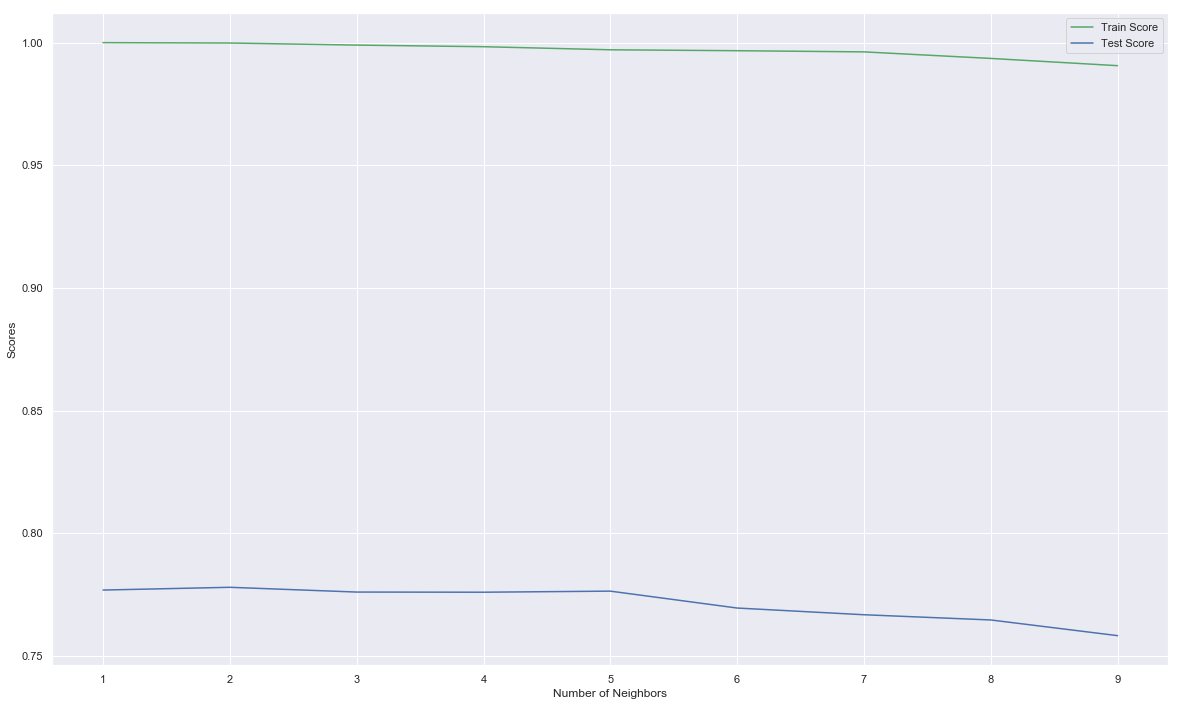

In [66]:
from sklearn.neighbors import KNeighborsRegressor

train_score_array = []
test_score_array = []


for k in range(1,10):
    knn_reg=KNeighborsRegressor(n_neighbors=k)
    ada_reg_knn = AdaBoostRegressor(knn_reg, n_estimators=500,learning_rate=0.5,random_state=0)
    ada_reg_knn.fit(X_train, y_train)
    train_score_array.append(ada_reg_knn.score(X_train, y_train))
    test_score_array.append(ada_reg_knn.score(X_test, y_test))

x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Scores')

In [67]:
dt_reg = KNeighborsRegressor(n_neighbors=5)
ada_reg_knn = AdaBoostRegressor(knn_reg, n_estimators=500,learning_rate=0.5,random_state=0)
ada_reg_knn.fit(X_train, y_train)

y_pred=ada_reg_knn.predict(X_test)

print('Train score: {:.4f} %'.format(ada_reg_dt.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(ada_reg_dt.score(X_test, y_test)*100))

print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))

Train score: 99.8955 %
Test score: 93.7672 %
RMSE: 3.8635


### Adaboosting Results:
#### 1.Using Decision Tree Regressor
 RMSE:1.9618
#### 2.Using KNN Regressor
 RMSE:3.8635
### Based on the RMSE,we can conclude that adaboosting using Decision Tree Regressor is better than KNN Regressor

# Gradient Boosting

In [67]:

from sklearn.model_selection import GridSearchCV
param_grid_gbt = {
            'max_depth': range(1,10),
            'alpha': [0.5,0.6,0.7,0.8,0.9],
            'n_estimators': [50,100,150,200,500],
            'learning_rate': [0.01,0.1,0.5,1]
            }

CV_gbt = GridSearchCV(estimator =gbrt, param_grid = param_grid_gbt , return_train_score=True, verbose = 1, n_jobs = -1)
CV_gbt.fit(X_train, y_train)

best_parameters_gbt=CV_gbt.best_params_
print(best_parameters_gbt)

Fitting 3 folds for each of 900 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 805 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 1505 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done 2405 tasks      | elapsed:   44.0s
[Parallel(n_jobs=-1)]: Done 2685 out of 2700 | elapsed:   47.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 2700 out of 2700 | elapsed:   47.7s finished


{'alpha': 0.5, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500}


In [71]:
from sklearn.ensemble import GradientBoostingRegressor

gbt_rf = GradientBoostingRegressor(n_estimators=500,learning_rate=0.1,random_state=0)
gbt_rf.fit(X_train, y_train)

y_pred=gbt_rf.predict(X_test)

print('Train score: {:.4f} %'.format(gbt_rf.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(gbt_rf.score(X_test, y_test)*100))

print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))

Train score: 99.9997 %
Test score: 93.3585 %
RMSE: 2.0251


#### Based on Gradient Boosting regressor,the RMSE is 2.0251

# PCA

In [68]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [69]:
X.head()

,Sector_score,PARA_A,PARA_B,Score_A,Score_B,numbers,Money_Value,History,History_score,Score,District,LOSS_SCORE,Inherent_Risk,CONTROL_RISK
0,3.89,4.18,2.50,0.6,0.2,5.0,3.38,0,2,2.4,2,2,8.574,0.4
1,3.89,0.00,4.83,0.2,0.2,5.0,0.94,0,2,2.0,2,2,2.554,0.4
2,3.89,0.51,0.23,0.2,0.2,5.0,0.00,0,2,2.0,2,2,1.548,0.4
3,3.89,0.00,10.80,0.2,0.6,6.0,11.75,0,2,4.4,2,2,17.530,0.4
4,3.89,0.00,0.08,0.2,0.2,5.0,0.00,0,2,2.0,2,2,1.416,0.4


In [70]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [71]:
X_scaled.shape

(681, 14)

Text(0, 0.5, 'cumulative explained variance')

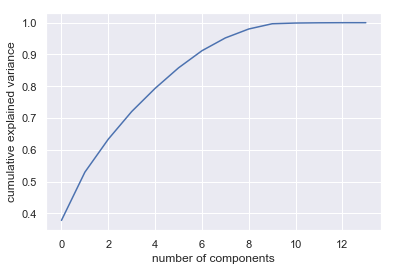

In [72]:
pca = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

##### From the graph,it can be inferred that 9 components explain the important features of the dataset

In [73]:
pca = PCA(n_components=9)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [74]:
print(pca.components_)

[[-0.18724918  0.29908304  0.33475796  0.30964298  0.34074201  0.21404107
   0.17580291  0.27558121  0.27760973  0.3977377   0.03735854  0.11413962
   0.28706269  0.25823268]
 [-0.12165386  0.13199163  0.08854204  0.17213014  0.12290209  0.13824199
   0.30862615 -0.45594327 -0.4494383   0.11576427 -0.11382868 -0.20095557
   0.29888264 -0.48465745]
 [ 0.1976425  -0.3058358  -0.08137323 -0.33290251 -0.19661191  0.15055199
   0.61451566  0.08864575  0.0812155  -0.13973699  0.10379551  0.09262416
   0.48156741  0.16051233]
 [-0.02899032  0.02824401 -0.01808445  0.03334807 -0.00730915  0.15782736
  -0.08284668 -0.28709603 -0.29248302  0.07088967  0.83151569  0.14968567
  -0.07214243  0.27031789]
 [-0.33218261  0.16568748 -0.16856473  0.16989736 -0.15173239 -0.41817378
   0.15636594 -0.1269644  -0.10854028 -0.11866976 -0.15332273  0.71046886
   0.07664368  0.0803074 ]
 [ 0.56926895 -0.15152111  0.25470921 -0.17461424  0.30688925  0.13970158
  -0.16104627 -0.16272756 -0.1577624   0.19003676 -

In [75]:
print(pca.explained_variance_)

[5.30139812 2.12625627 1.45503152 1.21960367 1.02131364 0.90514892
 0.7553591  0.56488369 0.39402663]


In [76]:
X_pca = pca.transform(X_scaled)
print("original shape:   ", X_scaled.shape)
print("transformed shape:", X_pca.shape)

original shape:    (681, 14)
transformed shape: (681, 9)


##### We are considering 9 components for PCA post dimemsionality reduction

# Regression Task with and without PCA

## 1.KNN Regressor

In [77]:
from sklearn.neighbors import KNeighborsRegressor

In [78]:
X_train_org, X_test_org, y_train, y_test = train_test_split(df_var,df_target_re, random_state = 0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [79]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca,df_target_re, random_state = 0)

Text(0, 0.5, 'MSE')

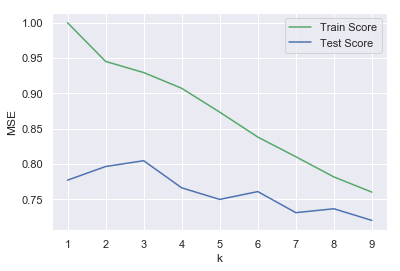

In [80]:
%matplotlib inline
train_score_array_knn = []
test_score_array_knn = []

for k in range(1,10):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train, y_train)
    train_score_array_knn.append(knn_reg.score(X_train, y_train))
    test_score_array_knn.append(knn_reg.score(X_test, y_test))

x_axis = range(1,10)
plt.plot(x_axis, train_score_array_knn, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array_knn, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

Text(0, 0.5, 'MSE')

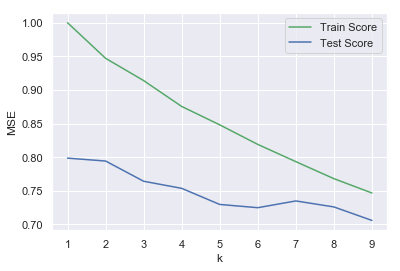

In [81]:
%matplotlib inline
train_score_array_knn_pca = []
test_score_array_knn_pca = []

for k in range(1,10):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train_pca, y_train_pca)
    train_score_array_knn_pca.append(knn_reg.score(X_train_pca, y_train_pca))
    test_score_array_knn_pca.append(knn_reg.score(X_test_pca, y_test_pca))

x_axis = range(1,10)
plt.plot(x_axis, train_score_array_knn_pca, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array_knn_pca, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

In [82]:
knn_reg = KNeighborsRegressor(3)
knn_reg.fit(X_train, y_train)
print('Train score: {}'.format(knn_reg.score(X_train, y_train)))
print('Test score: {}'.format(knn_reg.score(X_test, y_test)))

Train score: 0.9295100803685559
Test score: 0.8047401793104981


In [83]:
knn_reg = KNeighborsRegressor(3)
knn_reg.fit(X_train_pca, y_train_pca)
print('Train score: {}'.format(knn_reg.score(X_train_pca, y_train_pca)))
print('Test score: {}'.format(knn_reg.score(X_test_pca, y_test_pca)))

Train score: 0.9139944526202524
Test score: 0.7642868242820917


In [84]:
para_grid = {'n_neighbors' : [1, 2, 3, 4, 5], 'leaf_size' : [30, 40]}
grid_knnr = GridSearchCV(KNeighborsRegressor(), para_grid, cv = 5, return_train_score = True)
grid_knnr.fit(X_train, y_train)
print('Best parameter:',grid_knnr.best_params_)
print('Best score:',grid_knnr.best_score_)
y_pred = grid_knnr.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('R2 score: %.7f' % r2_score(y_test, y_pred))

Best parameter: {'leaf_size': 30, 'n_neighbors': 3}
Best score: 0.784598246715214
Mean squared error: 12.06
R2 score: 0.8047402


In [85]:
para_grid = {'n_neighbors' : [1, 2, 3, 4, 5], 'leaf_size' : [30, 40]}
grid_knnr = GridSearchCV(KNeighborsRegressor(), para_grid, cv = 5, return_train_score = True)
grid_knnr.fit(X_train_pca, y_train_pca)
print('Best parameter pca:',grid_knnr.best_params_)
print('Best score pca: ',grid_knnr.best_score_)
y_pred_pca = grid_knnr.predict(X_test_pca)
print("Mean squared error: %.2f" % mean_squared_error(y_test_pca, y_pred_pca))
# Explained variance score: 1 is perfect prediction
print('R2 score: %.7f' % r2_score(y_test_pca, y_pred_pca))

Best parameter pca: {'leaf_size': 30, 'n_neighbors': 3}
Best score pca:  0.7145889576091071
Mean squared error: 14.55
R2 score: 0.7642868


In [86]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=3)

print("Cross-validation scores for train:\n{}".format(cross_val_score(knn_reg, X_train, y_train, cv=kfold)))
print("Cross-validation scores for test:\n{}".format(cross_val_score(knn_reg, X_test, y_test, cv=kfold)))

Cross-validation scores for train:
[0.80220708 0.74838375 0.82903808]
Cross-validation scores for test:
[0.32664821 0.85771556 0.60168597]


In [87]:
print("Cross-validation scores for train - pca:\n{}".format(cross_val_score(knn_reg, X_train_pca, y_train_pca, cv=kfold)))
print("Cross-validation scores for test - pca:\n{}".format(cross_val_score(knn_reg, X_test_pca, y_test_pca, cv=kfold)))

Cross-validation scores for train - pca:
[0.80972705 0.74065894 0.54918605]
Cross-validation scores for test - pca:
[0.29350725 0.64760063 0.48774254]


## 2.Linear Regression

###### with standard scalar

In [88]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


X_train_org, X_test_org, y_train, y_test = train_test_split(df_var,df_target_re, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [89]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train, y_train)
print('train:', lreg.score(X_train, y_train))
print('test:', lreg.score(X_test, y_test))

train: 0.9355118379116906
test: 0.8806768225919929


In [90]:
lreg.fit(X_train_pca, y_train_pca)
print('train:', lreg.score(X_train_pca, y_train_pca))
print('test:', lreg.score(X_test_pca, y_test_pca))

train: 0.9302903648145362
test: 0.874053299130269


###### with MinMax scalar

In [91]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(df_var,df_target_re, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [92]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train, y_train)
print('train:', lreg.score(X_train, y_train))
print('test:', lreg.score(X_test, y_test))  


train: 0.9355118379116906
test: 0.8806768225919921


In [93]:
pred_test_lin = lreg.predict(X_test)

print("Mean squared error: %.2f" % mean_squared_error(y_test, pred_test_lin))
print('R2 score: %.7f' % r2_score(y_test,pred_test_lin))

Mean squared error: 7.37
R2 score: 0.8806768


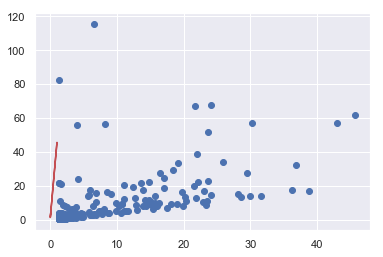

In [94]:
%matplotlib inline
import matplotlib.pyplot as plt

X_train_rm = X_train[:,2].reshape(-1,1)
lreg.fit(X_train_rm, y_train)
y_predict = lreg.predict(X_train_rm)

plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(y_predict,y_train)

In [95]:
cross_train = cross_val_score(lreg, X_train, y_train, cv=5)
cross_test = cross_val_score(lreg, X_test, y_test, cv=5)
print("Cross-validation scores for train: {}".format(cross_train))
print("Cross-validation scores for test : {}".format(cross_test))
print("Average cross-validation score for train: {}".format(cross_train.mean()))
print("Average cross-validation score for test: {}".format(cross_test.mean()))

Cross-validation scores for train: [0.92362684 0.90034033 0.96952402 0.90265574 0.70949009]
Cross-validation scores for test : [0.90229199 0.39015141 0.79206321 0.95248693 0.90168254]
Average cross-validation score for train: 0.8811274046201631
Average cross-validation score for test: 0.7877352176046964


In [96]:
cross_train = cross_val_score(lreg, X_train_pca, y_train_pca, cv=5)
cross_test = cross_val_score(lreg, X_test_pca, y_test_pca, cv=5)
print("Cross-validation scores for train - pca: {}".format(cross_train))
print("Cross-validation scores for test - pca: {}".format(cross_test))
print("Average cross-validation score for train - pca: {}".format(cross_train.mean()))
print("Average cross-validation score for test - pca: {}".format(cross_test.mean()))

Cross-validation scores for train - pca: [0.90984877 0.9019031  0.96896433 0.89971116 0.66137158]
Cross-validation scores for test - pca: [0.87850496 0.25934663 0.88816461 0.93734048 0.87945924]
Average cross-validation score for train - pca: 0.8683597872333376
Average cross-validation score for test - pca: 0.7685631832557707


In [97]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=3)

print("Cross-validation scores for train:\n{}".format(cross_val_score(lreg, X_train, y_train, cv=kfold)))
print("Cross-validation scores for test:\n{}".format(cross_val_score(lreg, X_test, y_test, cv=kfold)))

Cross-validation scores for train:
[0.91426506 0.95732809 0.79505215]
Cross-validation scores for test:
[0.58008942 0.74892368 0.92306404]


In [98]:
print("Cross-validation scores for train - pca:\n{}".format(cross_val_score(lreg, X_train_pca, y_train_pca, cv=kfold)))
print("Cross-validation scores for test - pca:\n{}".format(cross_val_score(lreg, X_test_pca, y_test_pca, cv=kfold)))

Cross-validation scores for train - pca:
[0.90645025 0.95480808 0.75805536]
Cross-validation scores for test - pca:
[0.5145358 0.8046988 0.9055399]


## 3.Ridge

In [99]:
x_range = [0.01, 0.1, 1, 10]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))

In [100]:
print(train_score_list)
print(test_score_list)

[0.9349364532634097, 0.9344660480354835, 0.9078683935462482, 0.6633769474900868]
[0.8820131346943539, 0.8815933330692822, 0.8619134995187674, 0.6829729784571141]


Text(0.5, 0, '$\\alpha$')

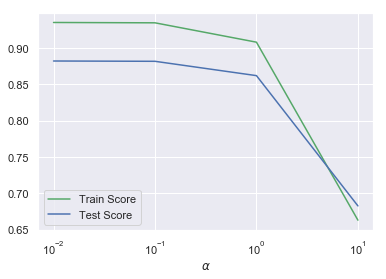

In [101]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [102]:
x_range = [0.01, 0.1, 1, 10, 100, 500]
train_score_list_pca = []
test_score_list_pca = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train_pca,y_train_pca)
    train_score_list_pca.append(ridge.score(X_train_pca,y_train_pca))
    test_score_list_pca.append(ridge.score(X_test_pca, y_test_pca))

In [103]:
print(train_score_list_pca)
print(test_score_list_pca)

[0.9302903647014095, 0.9302903535088516, 0.9302892411983138, 0.9301845260285417, 0.923617178410563, 0.8676795868579978]
[0.8740548017162949, 0.8740683010816929, 0.8742009444377858, 0.8753080059339474, 0.8738916799027503, 0.8212294863638961]


Text(0.5, 0, '$\\alpha$')

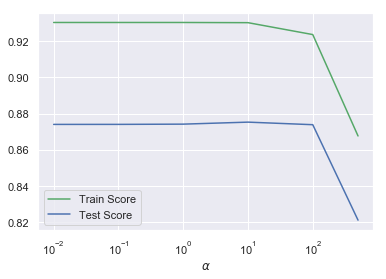

In [104]:
plt.plot(x_range, train_score_list_pca, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list_pca, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

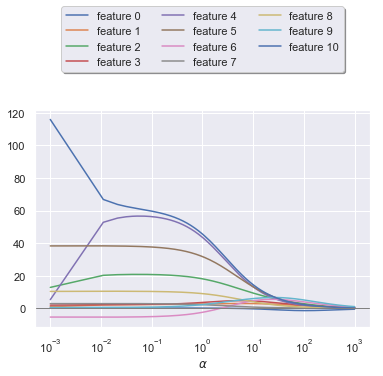

In [105]:
%matplotlib inline
import numpy as np

x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,11):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

In [106]:
param_grid = {'alpha': [0.01, 0.1, 1, 10,100]}
grid_ridge = GridSearchCV(Ridge(), param_grid, return_train_score = True, cv = 5)
grid_ridge.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [107]:
print("Best parameters: {}".format(grid_ridge.best_params_))

Best parameters: {'alpha': 0.1}


In [108]:
pred_ridge = grid_ridge.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, pred_ridge))
print('R2 score: %.7f' % r2_score(y_test,pred_ridge))

Mean squared error: 7.31
R2 score: 0.8815933


In [109]:
ridge10 = Ridge(alpha = 0.1)
ridge10.fit(X_train,y_train)
print('Train score: {}'.format(ridge10.score(X_train,y_train)))
print('Test score: {}'.format(ridge10.score(X_test, y_test)))

Train score: 0.9344660480354835
Test score: 0.8815933330692822


In [110]:
grid_ridge = GridSearchCV(Ridge(), param_grid, return_train_score = True, cv = 5)
grid_ridge.fit(X_train_pca, y_train_pca)
print("Best parameters - pca: {}".format(grid_ridge.best_params_))
pred_ridge_pca = grid_ridge.predict(X_test_pca)
print("Mean squared error - pca: %.2f" % mean_squared_error(y_test_pca, pred_ridge_pca))
print('R2 score - pca: %.7f' % r2_score(y_test_pca,pred_ridge_pca))

Best parameters - pca: {'alpha': 10}
Mean squared error - pca: 7.70
R2 score - pca: 0.8753080


In [111]:
ridge10 = Ridge(alpha = 10)
ridge10.fit(X_train_pca,y_train_pca)
print('Train score - pca: {}'.format(ridge10.score(X_train_pca,y_train_pca)))
print('Test score - pca: {}'.format(ridge10.score(X_test_pca, y_test_pca)))

Train score - pca: 0.9301845260285417
Test score - pca: 0.8753080059339474


In [112]:
from sklearn.model_selection import cross_val_score

cross_tr = cross_val_score(ridge, X_train, y_train, cv=5)
cross_ts = cross_val_score(ridge, X_test, y_test, cv=5)
print("Cross-validation scores for train: {}".format(cross_tr))
print("Cross-validation scores for test : {}".format(cross_ts))
print("Average cross-validation score for train: {:.2f}".format(cross_tr.mean()))
print("Average cross-validation score for test: {:.2f}".format(cross_ts.mean()))

Cross-validation scores for train: [0.04352399 0.09582872 0.0496856  0.1133521  0.09732877]
Cross-validation scores for test : [0.02876756 0.05058305 0.02510388 0.02446936 0.01419578]
Average cross-validation score for train: 0.08
Average cross-validation score for test: 0.03


In [113]:
cross_tr = cross_val_score(ridge, X_train_pca, y_train_pca, cv=5)
cross_ts = cross_val_score(ridge, X_test_pca, y_test_pca, cv=5)
print("Cross-validation scores for train - pca: {}".format(cross_tr))
print("Cross-validation scores for test - pca : {}".format(cross_ts))
print("Average cross-validation score for train - pca: {:.2f}".format(cross_tr.mean()))
print("Average cross-validation score for test - pca: {:.2f}".format(cross_ts.mean()))

Cross-validation scores for train - pca: [0.68747619 0.7443536  0.70525932 0.75754077 0.71607653]
Cross-validation scores for test - pca : [0.30387772 0.54692797 0.49967962 0.36172927 0.2478251 ]
Average cross-validation score for train - pca: 0.72
Average cross-validation score for test - pca: 0.39


In [114]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=3)

print("Cross-validation scores for train:\n{}".format(cross_val_score(ridge, X_train, y_train, cv=kfold)))
print("Cross-validation scores for test:\n{}".format(cross_val_score(ridge, X_test, y_test, cv=kfold)))

Cross-validation scores for train:
[0.04372461 0.0457397  0.11297963]
Cross-validation scores for test:
[ 0.02632458 -0.00023563 -0.0053255 ]


In [115]:
print("Cross-validation scores for train:\n{}".format(cross_val_score(ridge, X_train_pca, y_train_pca, cv=kfold)))
print("Cross-validation scores for test:\n{}".format(cross_val_score(ridge, X_test_pca, y_test_pca, cv=kfold)))

Cross-validation scores for train:
[0.6614633  0.65922655 0.77080592]
Cross-validation scores for test:
[0.32556149 0.4689904  0.21396354]


## 4.Lasso

In [116]:
from sklearn.linear_model import Lasso
x_range = [0.1, 1, 10,100,1000]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))

In [117]:
print(train_score_list)
print(test_score_list)

[0.8949967625679955, 0.2918103791751012, 0.0, 0.0, 0.0]
[0.8278705220388145, 0.4038726756916322, -0.013803965808781847, -0.013803965808781847, -0.013803965808781847]


Text(0.5, 0, '$\\alpha$')

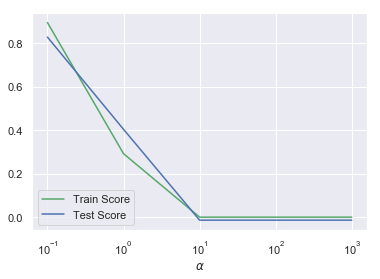

In [119]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

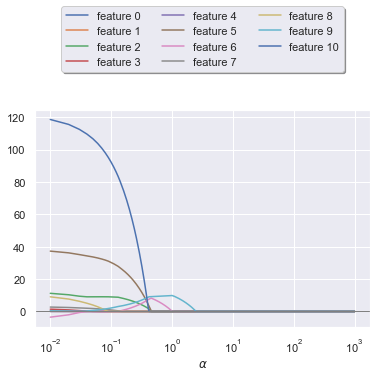

In [120]:
%matplotlib inline

x_range1 = np.linspace(0.01, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,11):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

In [121]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid_lasso = GridSearchCV(Lasso(), param_grid, return_train_score = True, cv=5)
grid_lasso.fit(X_train, y_train)

print("Best parameters: {}".format(grid_lasso.best_params_))

Best parameters: {'alpha': 0.01}


In [122]:
pred_lasso = grid_lasso.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, pred_lasso))
print('R2 score: %.7f' % r2_score(y_test,pred_lasso))

Mean squared error: 7.35
R2 score: 0.8810103


In [123]:
lasso10 = Lasso(alpha = 0.01)
lasso10.fit(X_train,y_train)
print('Train score: {}'.format(lasso10.score(X_train,y_train)))
print('Test score: {}'.format(lasso10.score(X_test, y_test)))

Train score: 0.9343234371724005
Test score: 0.8810102840513094


In [124]:
grid_lasso.fit(X_train_pca, y_train_pca)
print("Best parameters pca : {}".format(grid_lasso.best_params_))
pred_lasso_pca = grid_lasso.predict(X_test_pca)
print("Mean squared error -pca: %.2f" % mean_squared_error(y_test_pca, pred_lasso_pca))
print('R2 score - pca: %.7f' % r2_score(y_test_pca,pred_lasso_pca))

Best parameters pca : {'alpha': 0.1}
Mean squared error -pca: 7.49
R2 score - pca: 0.8787728


In [125]:
lasso10 = Lasso(alpha = 0.1)
lasso10.fit(X_train_pca,y_train_pca)
print('Train score: {}'.format(lasso10.score(X_train_pca,y_train_pca)))
print('Test score: {}'.format(lasso10.score(X_test_pca, y_test_pca)))

Train score: 0.9294806459676895
Test score: 0.8787727925515615


In [126]:
from sklearn.model_selection import cross_val_score

cross_tr = cross_val_score(lasso, X_train, y_train, cv=5)
cross_ts = cross_val_score(lasso, X_test, y_test, cv=5)
print("Cross-validation scores for train: {}".format(cross_tr))
print("Cross-validation scores for test : {}".format(cross_ts))
print("Average cross-validation score for train: {:.2f}".format(cross_tr.mean()))
print("Average cross-validation score for test: {:.2f}".format(cross_ts.mean()))

Cross-validation scores for train: [-0.02166458 -0.00307031 -0.00166635 -0.00140279 -0.0397432 ]
Cross-validation scores for test : [-1.87700718e-06 -1.11011441e-02 -2.62935196e-02 -2.06851321e-03
 -9.45896178e-03]
Average cross-validation score for train: -0.01
Average cross-validation score for test: -0.01


In [127]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=3)

print("Cross-validation scores for train:\n{}".format(cross_val_score(lasso, X_train, y_train, cv=kfold)))
print("Cross-validation scores for test:\n{}".format(cross_val_score(lasso, X_test, y_test, cv=kfold)))

Cross-validation scores for train:
[-0.01591828 -0.01017855 -0.00262334]
Cross-validation scores for test:
[-0.00429755 -0.04790569 -0.02266711]


## 5.Polynomial Regression

In [128]:
from  sklearn.preprocessing  import PolynomialFeatures

In [129]:
train_score_list_poly = []
test_score_list_poly = []

for n in range(1,5):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lreg.fit(X_train_poly, y_train)
    train_score_list_poly.append(lreg.score(X_train_poly, y_train))
    test_score_list_poly.append(lreg.score(X_test_poly, y_test))

In [130]:
print(train_score_list_poly)
print(test_score_list_poly)

[0.9355118379116906, 0.9994423107033249, 1.0, 1.0]
[0.8806768225919929, 0.9864749428116011, 0.9902468896792193, 0.9852459856290947]


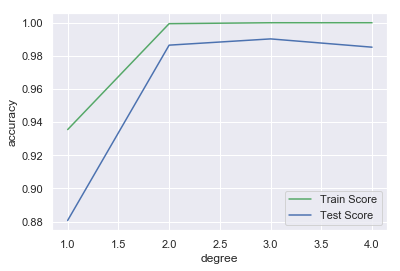

In [131]:
%matplotlib inline

x_axis = range(1,5)
plt.plot(x_axis, train_score_list_poly, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list_poly, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()

In [132]:
train_score_list_poly_pca = []
test_score_list_poly_pca = []

for n in range(1,5):
    poly = PolynomialFeatures(n)
    X_train_poly_pca = poly.fit_transform(X_train_pca)
    X_test_poly_pca = poly.transform(X_test_pca)
    lreg.fit(X_train_poly_pca, y_train_pca)
    train_score_list_poly_pca.append(lreg.score(X_train_poly_pca, y_train_pca))
    test_score_list_poly_pca.append(lreg.score(X_test_poly_pca, y_test_pca))

In [133]:
print(train_score_list_poly_pca)
print(test_score_list_poly_pca)

[0.9302903648145362, 0.9997893541714675, 0.9999999999999902, 1.0]
[0.8740532991302689, 0.9932020033317472, -2277654.9568103594, -2124752.0516910297]


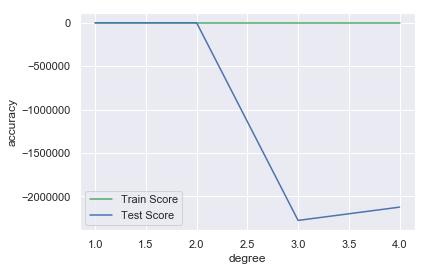

In [134]:
%matplotlib inline

x_axis = range(1,5)
plt.plot(x_axis, train_score_list_poly_pca, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list_poly_pca, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()

### Polynomial (degree = 3)

In [135]:
poly = PolynomialFeatures(3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
lreg.fit(X_train_poly, y_train)
pred_poly = lreg.predict(X_test_poly)
pred_poly = lreg.predict(X_train_poly)

print(lreg.score(X_train_poly, y_train))
print('R-squared:', lreg.score(X_test_poly, y_test))

1.0
R-squared: 0.9902468896792193


### Polynomial (degree = 2):PCA

In [136]:
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train_pca)
X_test_poly = poly.transform(X_test_pca)
lreg.fit(X_train_poly, y_train)
pred_poly = lreg.predict(X_test_poly)
pred_poly = lreg.predict(X_train_poly)

print(lreg.score(X_train_poly, y_train_pca))
print('R-squared pca:', lreg.score(X_test_poly, y_test_pca))

0.9997893541714675
R-squared pca: 0.9932020033317472


## 6. Support Vector Regressor - Linear

In [137]:
from sklearn.svm import LinearSVR
from sklearn.preprocessing import StandardScaler

In [138]:
X_train_org, X_test_org, y_train, y_test = train_test_split(df_var,df_target_re, random_state = 0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [139]:
param_grid = {'C':[0.01,0.1,1,10,100],'max_iter':[50000,200000],'epsilon':[0.01,1,10]}
grid_svr_lin=GridSearchCV(LinearSVR(), param_grid, cv = 3, return_train_score = True, verbose=1)
grid_svr_lin.fit(X_train, y_train)
print("Best parameters",grid_svr_lin.best_params_)
print("Best Score",grid_svr_lin.best_score_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best parameters {'C': 1, 'epsilon': 1, 'max_iter': 200000}
Best Score 0.8609162598542291


[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   16.3s finished


In [140]:
SVR1 = LinearSVR(C=1,epsilon = 1,max_iter = 200000)
SVR1.fit(X_train, y_train)
pred_lin_svr_test = SVR1.predict(X_test)
pred_lin_svr_train = SVR1.predict(X_train)

In [141]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, pred_lin_svr_test))
# Explained variance score: 1 is perfect prediction
print('R2 score: %.7f' % r2_score(y_test, pred_lin_svr_test))
print('Train Score: %.7f' % r2_score(y_train, pred_lin_svr_train))

Mean squared error: 7.97
R2 score: 0.8708771
Train Score: 0.9162826


In [142]:
grid_svr_lin.fit(X_train_pca, y_train_pca)
print("Best parameters pca ",grid_svr_lin.best_params_)
print("Best Score - pca",grid_svr_lin.best_score_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best parameters pca  {'C': 0.1, 'epsilon': 1, 'max_iter': 200000}
Best Score - pca 0.8626468118214313


[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    7.0s finished


In [143]:
SVR1 = LinearSVR(C=0.1,epsilon = 1,max_iter = 200000)
SVR1.fit(X_train_pca, y_train_pca)
pred_lin_svr_test = SVR1.predict(X_test_pca)
pred_lin_svr_train = SVR1.predict(X_train_pca)
# The mean squared error
print("Mean squared error pca : %.2f" % mean_squared_error(y_test, pred_lin_svr_test))
# Explained variance score: 1 is perfect prediction
print('R2 score pca: %.7f' % r2_score(y_test_pca, pred_lin_svr_test))
print('Train Score pca: %.7f' % r2_score(y_train_pca, pred_lin_svr_train))

Mean squared error pca : 8.24
R2 score pca: 0.8665988
Train Score pca: 0.9000203


## 7. SVR - Kernel

In [144]:
from sklearn.svm import SVR

In [145]:
C = [0.1, 1, 10, 50, 100]
param_grid = [
     {'C': C, 'kernel': ['linear'],'gamma': [0.1, 0.01, 0.001]},
     {'C': C, 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf']},
     {'degree': [2,3,4],'gamma': [0.1, 0.01, 0.001], 'kernel': ['poly']},
     {'coef0': [0.0], 'gamma': [0.1, 0.01, 0.001],'kernel': ['sigmoid']} 
]

In [146]:
model = SVR()
grid_svr_ker = GridSearchCV(model, param_grid, cv = 5)
grid_svr_ker.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': [0.1, 1, 10, 50, 100], 'kernel': ['linear'], 'gamma': [0.1, 0.01, 0.001]}, {'C': [0.1, 1, 10, 50, 100], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf']}, {'degree': [2, 3, 4], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['poly']}, {'coef0': [0.0], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['sigmoid']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [147]:
print("Best parameters set found :", grid_svr_ker.best_params_)
print("Best Score",grid_svr_ker.best_score_)

Best parameters set found : {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best Score 0.9035527745203632


Mean squared error: 1.48
R2 score: 0.9759656
Train Score: 0.9963805


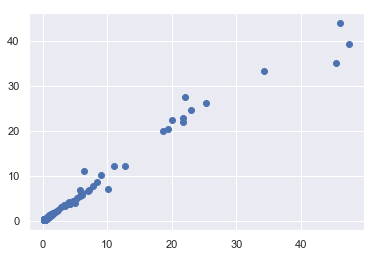

In [148]:
pred_svr_ker = grid_svr_ker.best_estimator_.predict(X_test)
pred_svr_ker_train = grid_svr_ker.best_estimator_.predict(X_train)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, pred_svr_ker))
# Explained variance score: 1 is perfect prediction
print('R2 score: %.7f' % r2_score(y_test, pred_svr_ker))
print('Train Score: %.7f' % r2_score(y_train, pred_svr_ker_train))


# Plot outputs
plt.scatter(y_test,pred_svr_ker)

plt.show()

In [149]:
model = SVR()
grid_svr_ker = GridSearchCV(model, param_grid, cv = 5)
grid_svr_ker.fit(X_train_pca, y_train_pca)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': [0.1, 1, 10, 50, 100], 'kernel': ['linear'], 'gamma': [0.1, 0.01, 0.001]}, {'C': [0.1, 1, 10, 50, 100], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf']}, {'degree': [2, 3, 4], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['poly']}, {'coef0': [0.0], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['sigmoid']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [150]:
print("Best parameters set found - pca:", grid_svr_ker.best_params_)
print("Best Score - pca",grid_svr_ker.best_score_)

Best parameters set found - pca: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best Score - pca 0.8658766475790874


Mean squared error pca: 0.97
R2 score pca: 0.9842665
Train Score pca: 0.9968147


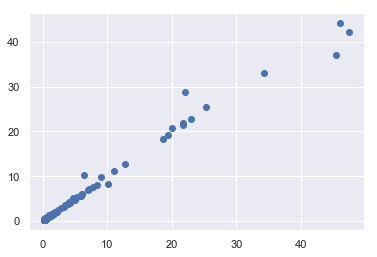

In [151]:
pred_svr_ker = grid_svr_ker.best_estimator_.predict(X_test_pca)
pred_svr_ker_train = grid_svr_ker.best_estimator_.predict(X_train_pca)
# The mean squared error
print("Mean squared error pca: %.2f" % mean_squared_error(y_test_pca, pred_svr_ker))
# Explained variance score: 1 is perfect prediction
print('R2 score pca: %.7f' % r2_score(y_test_pca, pred_svr_ker))
print('Train Score pca: %.7f' % r2_score(y_train_pca, pred_svr_ker_train))


# Plot outputs
plt.scatter(y_test_pca,pred_svr_ker)

plt.show()

# Summary Table

#### 1. KNN Regressor
    Best parameter: {'leaf_size': 30, 'n_neighbors': 3}
    Best score: 0.784598246715214
    Mean squared error: 12.06
    R2 score: 0.8047402
    
    PCA:
    Best parameter pca: {'leaf_size': 30, 'n_neighbors': 3}
    Best score pca:  0.7145889576121557
    Mean squared error: 14.55
    R2 score: 0.7642868

#### 2. Linear Regression
    Mean squared error: 7.37
    R2 score: 0.8806768
    train: 0.9355118379116906
    
    PCA:
    R2 score: 0.8740532991302692
    train: 0.9302903648145362
    
#### 3. Ridge
    Best parameters: {'alpha': 0.1}
    Mean squared error: 7.31
    R2 score: 0.8815933
    Train score: 0.9344660480354835 
    
    PCA:
    Best parameters - pca: {'alpha': 10}
    Mean squared error - pca: 7.70
    R2 score - pca: 0.8753080
    Train score - pca: 0.9301845260285417

#### 4. Lasso
    Best parameters: {'alpha': 0.01}
    Mean squared error: 7.35
    R2 score: 0.8815933330692822
    Train score: 0.9344660480354835
    
    PCA:
    Best parameters pca : {'alpha': 0.1}
    Mean squared error -pca: 7.49
    R2 score - pca: 0.8787728
    Train score: 0.9294806459676895

#### 5. Polynomial 
    degree = 3
    Train Score : 1.0
    R2 score    : 0.9902468896792201
    
    PCA:
    degree = 2
    Train Score : 0.9997893541714675
    R-squared pca: 0.9932020033317467
    
#### 5. SVM 
    Best parameters {'C': 1, 'epsilon': 1, 'max_iter': 200000}
    Mean squared error: 7.97
    R2 score: 0.8709376
    Train Score: 0.9162991
    
    PCA:
    Best parameters pca  {'C': 0.1, 'epsilon': 1, 'max_iter': 200000}
    Mean squared error pca : 8.24
    R2 score pca: 0.8665698
    Train Score pca: 0.9000451
    
    
#### 5. SVM - Kernel
    Best parameters set found : {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
    Mean squared error: 1.48
    R2 score: 0.9759656
    Train Score: 0.9963805
    
    PCA: 
    Best parameters set found - pca: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
    Mean squared error pca: 0.97
    R2 score pca: 0.9842665
    Train Score pca: 0.9968147



### Based on the R2 score, SVM with kernel = rbf with data after PCA (n_components = 9) found to be best model 
    Best Test R2 Score : 0.9842665
    Best Train R2 Score : 0.9968147

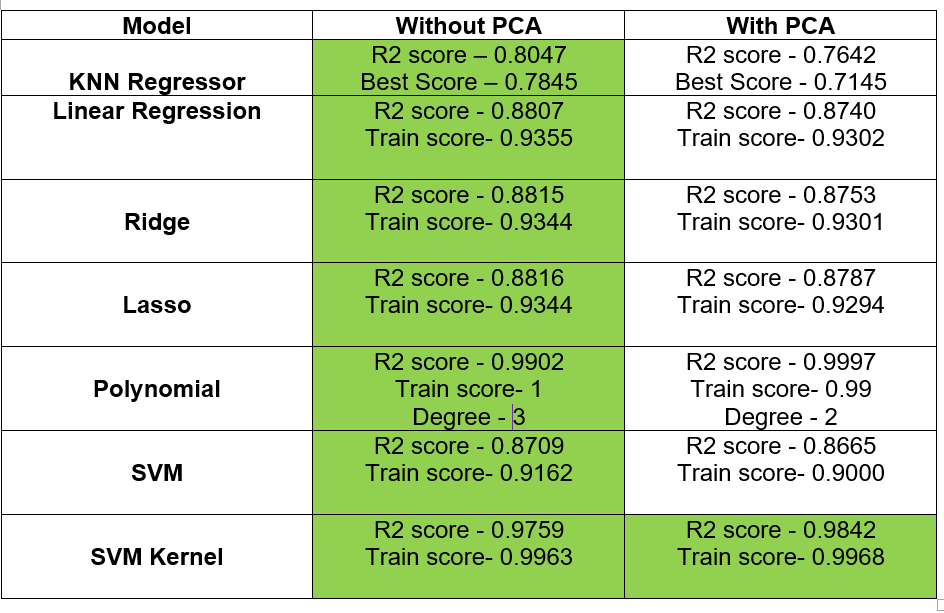

### Here the green portion indicate the best results.Although we have considered 9 best components post dimensionality reduction for PCA,it does't seem to have improving effects on the R2 score of any of the above models except for SVM Kernel rbf model.However,the computational speed improves after implementing PCA.

# Neural Networks

## 1.Perceptron

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

#step 1: build model
model_nn_1 = Sequential()
#input layer
model_nn_1.add(Dense(10, input_dim = 18, activation = 'sigmoid'))
#hidden layers
#output layer
model_nn_1.add(Dense(1, activation=None))

#step 2: make computational graph - compile
model_nn_1.compile(loss='mean_squared_error' , optimizer = 'sgd',metrics=['mae', 'acc'] )

#step 3: train the model - fit
model_nn_1.fit(X_train, y_train, epochs =100, batch_size = 100)
#step 4: evaluation

In [ ]:
model_nn_1.evaluate(X_train, y_train)

In [ ]:
model_nn_1.evaluate(X_test, y_test)

In [ ]:
y_pred=model_nn_1.predict(X_test)

print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))

## 2.MLP

In [ ]:
#step 1: build model
model_nn_2 = Sequential()
#input layer
model_nn_2.add(Dense(10, input_dim = 18, activation = 'sigmoid'))
#hidden layers
model_nn_2.add(Dense(20, activation = 'sigmoid'))
model_nn_2.add(Dense(20, activation = 'sigmoid'))
#output layer
model_nn_2.add(Dense(1))

#step 2: compile the model
model_nn_2.compile(loss='mean_squared_error' , optimizer = 'sgd',metrics=['mae'] )

#step 3: train the model
model_nn_2.fit(X_train, y_train, epochs = 100, batch_size = 100)

#step 4: evaluate

In [ ]:
model_nn_2.evaluate(X_train, y_train)

In [ ]:
model_nn_2.evaluate(X_test, y_test)

In [ ]:
y_pred=model_nn_2.predict(X_test)

print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))